In [26]:


from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score

def input_mlflow(cv_r_v,increment_number,X_train, y_train,pipeline,run_name,experiment_id,X_test,y_test):
    

    for wi in range(len(cv_r_v)):
        
        #====================skema===================
        cols_spec = []
        data_map = {
                'int64': 'integer',
                'float64': 'double',
                'bool': 'boolean',
                'str': 'string',
                'object': 'string',
                "date": 'datetime'
            }

        for name, dtype in X_train.dtypes.to_dict().items():
            cols_spec.append(ColSpec(name=name, type=data_map[str(dtype)]))
        input_schema = Schema(inputs=cols_spec)
        output_schema = Schema([ColSpec(name="label", type="string")])
        #parameter = ParamSpec(name="model_name", dtype="string", default="model1")
        #param_schema = ParamSchema(params=[parameter])
        model_signature = ModelSignature(inputs=input_schema, outputs=output_schema)#, params=param_schema)
        #print("MODEL SIGNATURE")
        #print(model_signature.to_dict())

        model_signature = infer_signature(X_train, y_train)#, params={"model_name": "model1"})
        #print("MODEL SIGNATURE")
        #print(model_signature.to_dict())

        
        
        
        
        #====================buat run baru===================
        run_name_with_increment = f"{run_name}__{increment_number}"
            # Membuka run MLflow
        with mlflow.start_run(run_name=run_name_with_increment, experiment_id=experiment_id) as run:
            # Mendapatkan run_id
            run_id = mlflow.active_run().info.run_id
        increment_number=increment_number+1
        print(f"{increment_number-1} --> run_id:", run_id)

        
        
        #====================buat parameter model dan metric===================

        # Definisikan grid parameter untuk dicari
        param_grid = cv_r_v[wi]
        
        #====================model===================

        # Inisialisasi GridSearchCV
        grid_search = GridSearchCV(pipeline, param_grid, cv=5,  scoring='accuracy')

        # Lakukan pencarian grid
        grid_search.fit(X_train, y_train)
        
            
        #====================parameter===================
        pipe=grid_search.best_estimator_
        
        
        first_step_name = list(pipe.named_steps.keys())[0:len(pipe)]
        

        for i in range(len(pipe)):
            # Mendapatkan parameter dari langkah 'sca'
            nama=first_step_name[i]
            sca_params = pipe.get_params()[nama]

                # Membuka run MLflow
            with mlflow.start_run( experiment_id=experiment_id,run_id=run_id) as run:

                # Log parameter secara otomatis menggunakan loop
                for param_name, param_value in sca_params.get_params().items():
                    param_name=nama+'__'+param_name
                    #print(param_name,param_value)
                    mlflow.log_param(param_name, param_value)
                    
                    
                #====================metric===================
                #matric
                hasil_test=grid_search.predict(X_test)
 
                
                
                
                                # Menghitung akurasi
                accuracy = accuracy_score(y_test, hasil_test)

                # Menghitung F1 score
                f1 = f1_score(y_test, hasil_test,average='macro')

                # Menghitung recall
                recall = recall_score(y_test, hasil_test,average='macro')

                
                
                                # Menghitung precision
                precision = precision_score(y_test, hasil_test,average='macro')


   
                

                # log model 
                mlflow.sklearn.log_model(sk_model=grid_search, artifact_path="grid_search__"+str(increment_number-1),signature=model_signature)

                metrics = {
                    'mean_test_score':pd.DataFrame(grid_search.cv_results_)['mean_test_score'].values[0],
                    "accuracy": accuracy,
                    "f1": f1,
                    "recall": recall,
                    "precision": precision,
         
                }

                mlflow.log_metrics(metrics)
                
                
        mlflow.end_run()
    print('selesai')

        
    return increment_number


            


def ambil_best(grid_search,n):
    cv_r=grid_search.copy()
    cv_r_v=cv_r.sort_values(['rank_test_score'])
    cv_r_v=cv_r_v.head(n)['params'].values

    for wi in range(len(cv_r_v)):

        for i in list(cv_r_v[wi]):

            cv_r_v[wi][i]=[cv_r_v[wi][i]]


    return cv_r_v


In [29]:
import mlflow.sklearn
from sklearn.metrics import classification_report, confusion_matrix


def test(model_paths,X_test2,y_test):
    ii=1
    for i, model_path in enumerate(model_paths, start=1):
        print(f'\n\n================================| model {ii} |==========================================')
        
        model = mlflow.sklearn.load_model(model_path)
        y_pred = model.predict(X_test2)
        print(f"Classification Report for model {model_path[-2:]}:")
        print(classification_report(y_test, y_pred))
        print(f"Confusion Matrix for model {model_path[-2:]}:\n", confusion_matrix(y_test, y_pred), '\n\n')
        
        ii=ii+1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
# import libraries

import scipy.stats as stats




import statsmodels.api as sm




from scipy.stats import shapiro,normaltest,kstest,jarque_bera
import pingouin as pg
from pingouin import kruskal




from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import mlflow



from mlflow.models.signature import ModelSignature
from mlflow.models.signature import infer_signature
from mlflow.types.schema import Schema
from mlflow.types.schema import ParamSchema
from mlflow.types.schema import ParamSpec
from mlflow.types.schema import ColSpec
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
from typing import Tuple


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector

In [4]:
df = pd.read_csv("data/data_csv/data_bersih.csv")

In [5]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Class
0,3.62160,8.6661,-2.8073,0
1,4.54590,8.1674,-2.4586,0
2,3.86600,-2.6383,1.9242,0
3,3.45660,9.5228,-4.0112,0
4,0.32924,-4.4552,4.5718,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1368 non-null   float64
 1   Skewness_Wavelet  1368 non-null   float64
 2   Curtosis_Wavelet  1368 non-null   float64
 3   Class             1368 non-null   object 
dtypes: float64(3), object(1)
memory usage: 42.9+ KB


In [9]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

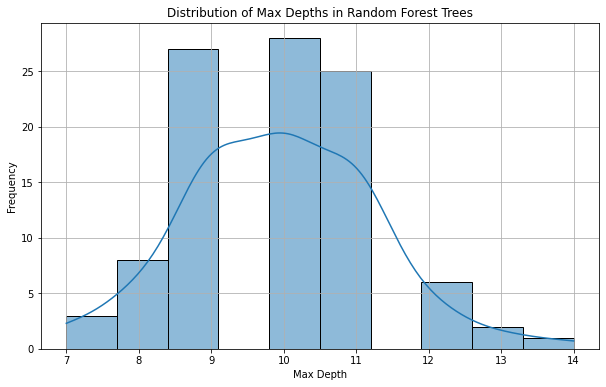

In [12]:
mod = RandomForestClassifier()
mod.fit(X_train, y_train)

# Mendapatkan kedalaman maksimum dari setiap pohon dalam hutan acak
max_depths = [estimator.tree_.max_depth for estimator in mod.estimators_]

# Membuat plot
plt.figure(figsize=(10, 6))
sns.histplot(max_depths, bins=10, kde=True)
plt.title('Distribution of Max Depths in Random Forest Trees')
plt.xlabel('Max Depth')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
n_estimators=[64,100,128,150,90,200]
bootstrap = [True,False]
oob_score = [True,False]


In [15]:
param_grid = {'rfc__n_estimators':n_estimators,
              'rfc__criterion':['gini','entropy'],
              'rfc__random_state':[11],
             'rfc__ccp_alpha': [0.0, 0.01, 0.1],
             'rfc__max_depth':np.arange(7,15),
             'rfc__bootstrap':bootstrap,
             'rfc__oob_score':oob_score} 
# Note, oob_score only makes sense when bootstrap=True!

In [16]:


numeric_features = selector(dtype_exclude="O")
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ]
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('rfc', RandomForestClassifier())])


In [18]:
grid_search_rfc = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score=np.nan)
grid_search_rfc .fit(X_train, y_train)


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002B33ED83820>)])),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__bootstrap': [True, False],
                         'rfc__ccp_alpha': [0.0, 0.01, 0.1],
                         'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_depth': array([ 7,  8,  9, 10, 11, 12, 13, 14]),
                         'rfc__n_estimators': [64, 100, 128, 150, 90, 70],
                         '

In [20]:
df_1 = pd.DataFrame(grid_search_rfc.cv_results_)
df_1.drop_duplicates(subset=['mean_test_score', 'std_test_score', 'rank_test_score'], inplace=True)
df_1 = df_1.sort_values(by=['mean_test_score', 'std_test_score'], ascending=[False, True])
df_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__bootstrap,param_rfc__ccp_alpha,param_rfc__criterion,param_rfc__max_depth,param_rfc__n_estimators,param_rfc__oob_score,param_rfc__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
613,0.372688,0.007665,0.005043,0.006476,False,0.0,gini,10,64,False,11,"{'rfc__bootstrap': False, 'rfc__ccp_alpha': 0....",0.995434,0.995434,0.995434,0.986301,0.986239,0.991768,0.004489,-2147483648
597,0.431171,0.032459,0.018504,0.008862,False,0.0,gini,8,90,False,11,"{'rfc__bootstrap': False, 'rfc__ccp_alpha': 0....",0.995434,0.995434,0.995434,0.990868,0.981651,0.991764,0.005357,-2147483648
697,0.378513,0.082964,0.012542,0.006271,False,0.0,entropy,9,64,False,11,"{'rfc__bootstrap': False, 'rfc__ccp_alpha': 0....",0.995434,0.995434,0.990868,0.986301,0.986239,0.990855,0.004098,-2147483648
719,0.466735,0.060527,0.015267,0.000636,False,0.0,entropy,10,70,False,11,"{'rfc__bootstrap': False, 'rfc__ccp_alpha': 0....",0.995434,0.995434,0.995434,0.981735,0.986239,0.990855,0.005786,-2147483648
24,0.454395,0.060231,0.039746,0.033799,True,0.0,gini,9,64,True,11,"{'rfc__bootstrap': True, 'rfc__ccp_alpha': 0.0...",0.995434,0.995434,0.995434,0.986301,0.981651,0.990851,0.005802,-2147483648


In [23]:
data_ambil=ambil_best(df_1.head(10),10)


In [24]:
if __name__ == "__main__":

    experiment_id = mlflow.create_experiment(
        name="project_RandomForestClassifier_new",
        tags={"env": "dev", "version": "1.0.0"},
    )

    print(experiment_id)
    

mlflow.end_run()


953936056196203755


In [25]:
run_name = "log___"
increment_number = 1

In [28]:

increment_number=input_mlflow(data_ambil,increment_number,X_train, y_train,pipeline,run_name,experiment_id,X_test,y_test)

1 --> run_id: f0e26cf98911425aa95f80b64e5819d1


C:\Users\ACER\anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


2 --> run_id: 20aa8ad4f60f4775aff2144d063c38b0
3 --> run_id: 229fe77d17ae4a97aa31e7f443dd960e
4 --> run_id: 70ad1e94cfc1494591fa7437eb5f8011
5 --> run_id: ccae26df297a48008421366ada7825df
6 --> run_id: e5490d0b36a64c2db362618c61da2d88
7 --> run_id: 7b5b26c9b3764a8bbd68f968502c5dbd
8 --> run_id: a241ac09af934f95a1cf8b4d1921f089
9 --> run_id: 93b7dfd143b04413aa3f760431b36a79
10 --> run_id: bb4e9d1879874908aae81f821ce39da4
selesai


In [30]:
model_paths = [
  
    'mlruns/953936056196203755/f0e26cf98911425aa95f80b64e5819d1/artifacts/grid_search__1',
    'mlruns/953936056196203755/20aa8ad4f60f4775aff2144d063c38b0/artifacts/grid_search__2',
    'mlruns/953936056196203755/229fe77d17ae4a97aa31e7f443dd960e/artifacts/grid_search__3',
    
    
    ]

test(model_paths,X_test,y_test)



================================| model 1 |==========================================
Classification Report for model _1:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       159
           1       0.97      1.00      0.99       115

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274

Confusion Matrix for model _1:
 [[156   3]
 [  0 115]] 




================================| model 2 |==========================================
Classification Report for model _2:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       159
           1       0.97      1.00      0.99       115

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274

Confusion Matrix for model _2:
 [[156   